In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
import glob
import pickle
from datetime import datetime, timedelta
import sys

#import the folder that has the analysis level class
sys.path.append("../CombinedData/")
import Dataset

In [2]:
topdir = "../../data/Run7/"
datasets = ["cosmics-endofrun/", "ds01/","ds02/","ds03/", "ds04/","ds05/","ds06/","ds07/",\
        "ds08/","ds09/","ds10/","ds11/","filling/", "room-temp-dark-noise/"]

ds_single = "ds11/"
config = "../configs/run7_config.yaml"

In [3]:
#load the dataset object for the single file selected
ds = Dataset.Dataset(topdir+ds_single, config)

# Get coincidence events and then plot separately

In [4]:
#get any charge events above 2 mV
amp_th = 2
events = [] #{"time": datetime, "amp": mV, "hv": kV con}
for f in ds.ad2_files:
    df, date = pickle.load(open(f, "rb")) #opens the pandas dataframe object in the pickle file
    for evidx, row in df.iterrows():
        ch1 = row["Data"][0]
        dT = row["dT"]
        if(np.max(ch1) > amp_th):
            amp = np.max(ch1)
            kv = ds.get_hv_at_time(row["Seconds"])
            events.append({"time":row["Seconds"], "time_ns": row["Nanoseconds"], "amp":amp, "hv":kv})

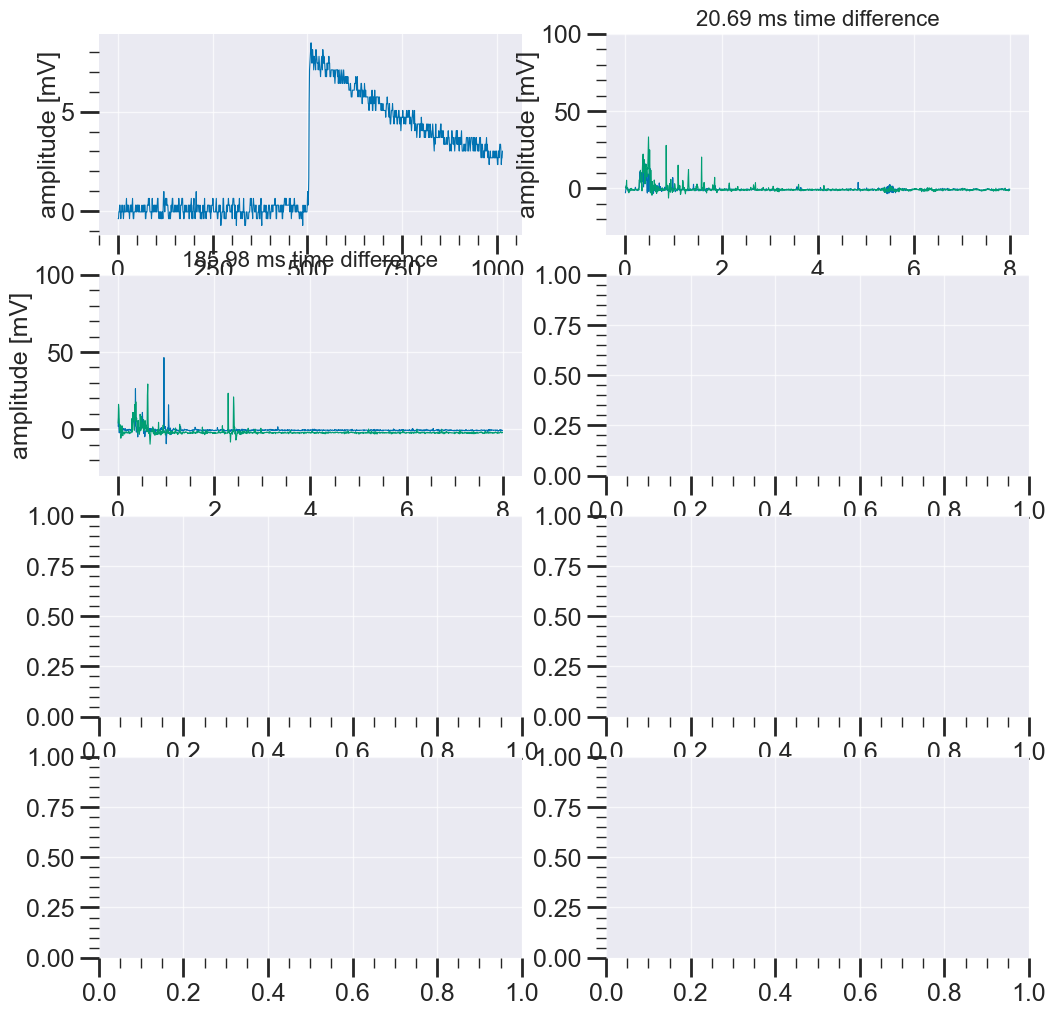

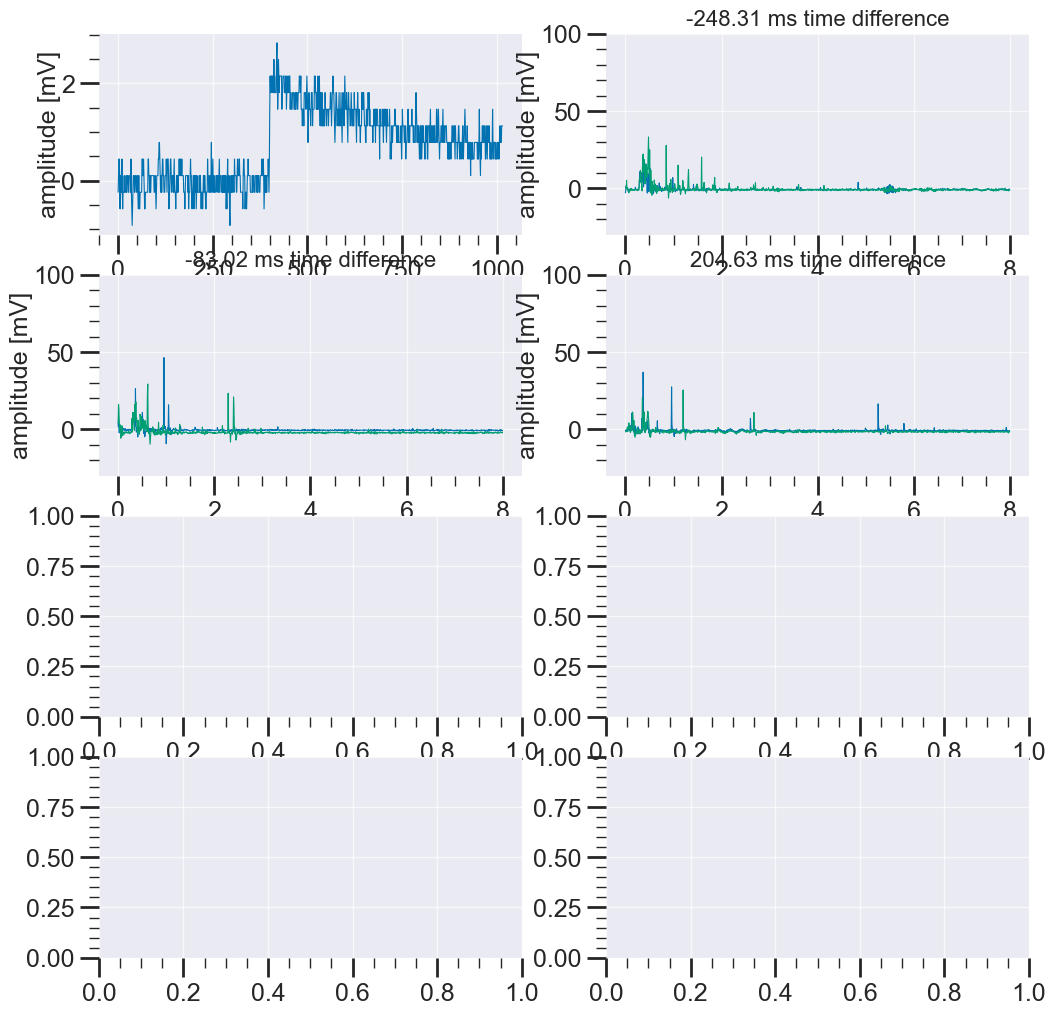

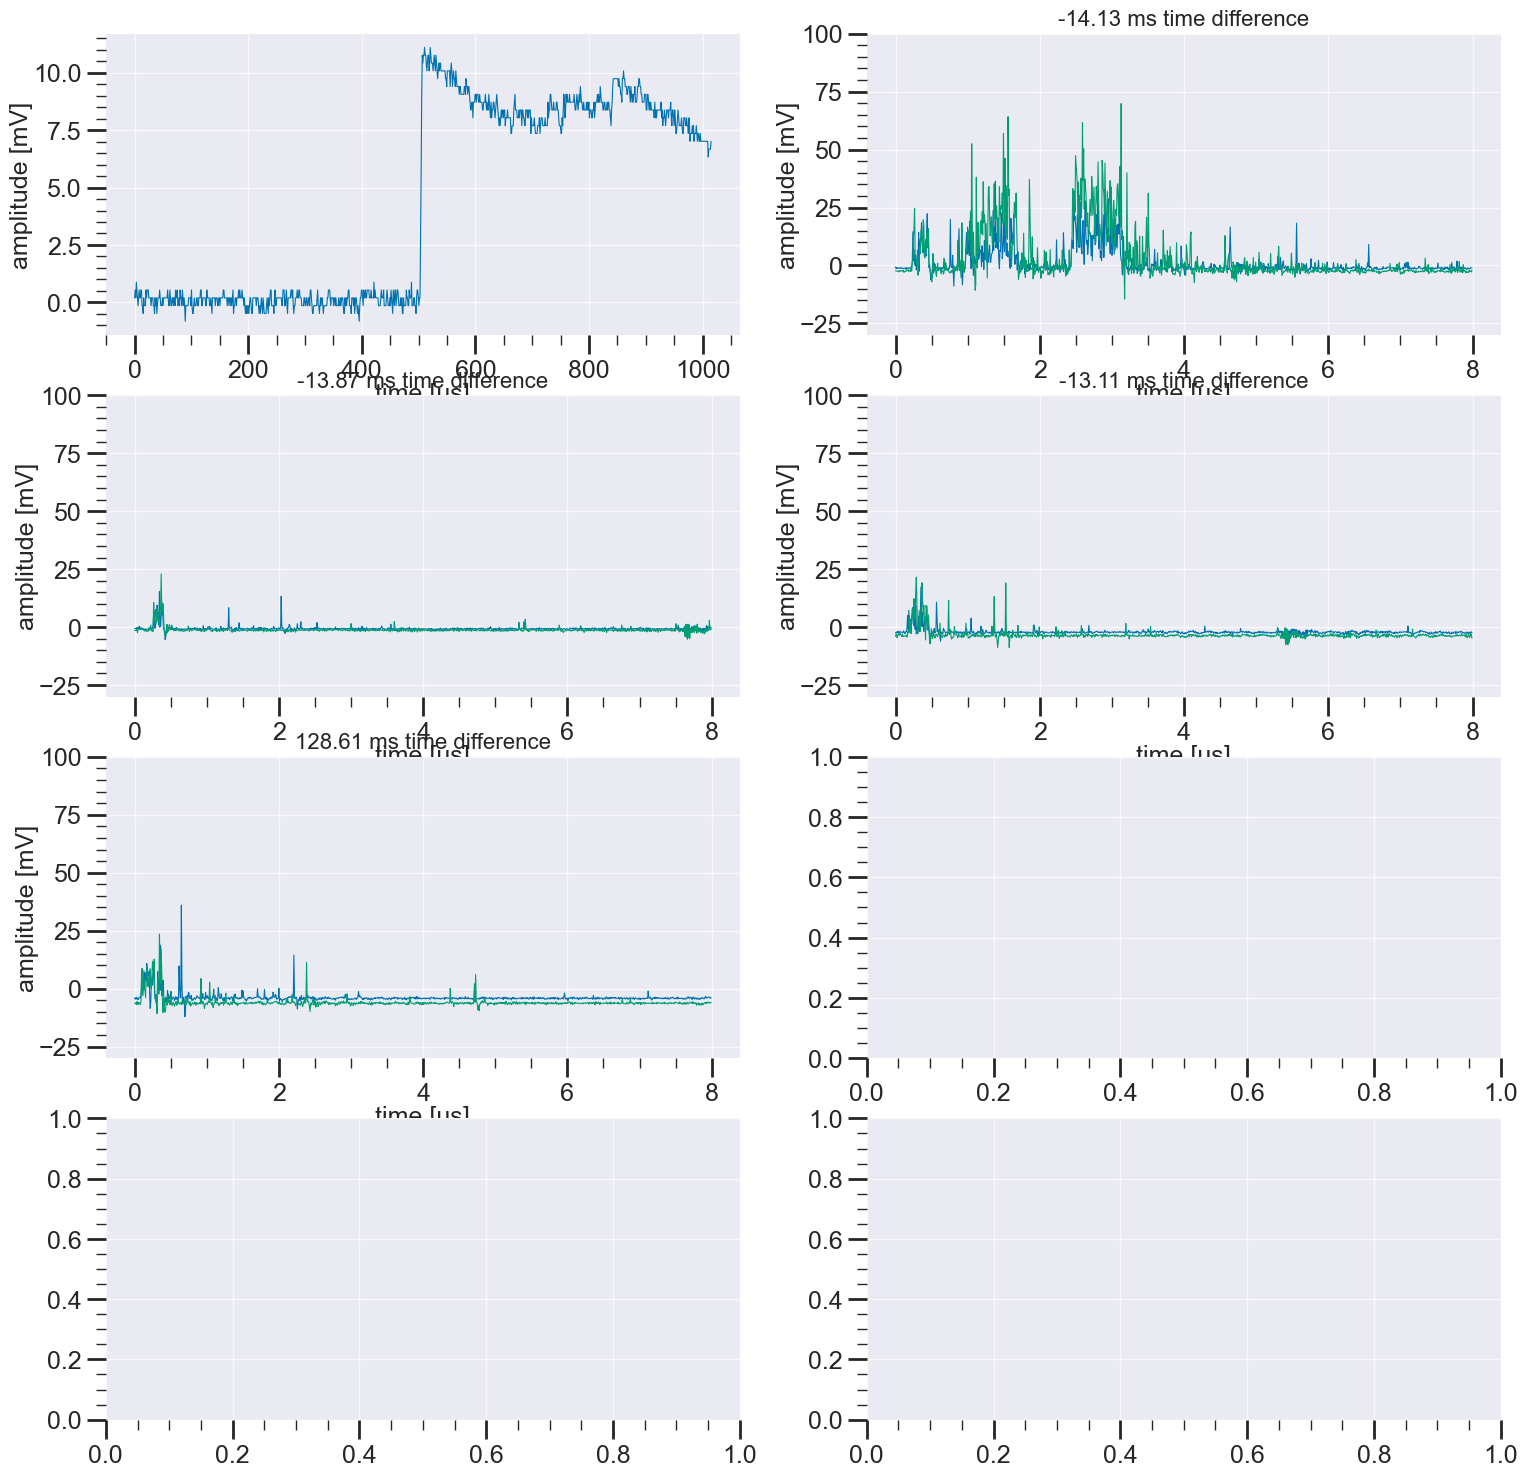

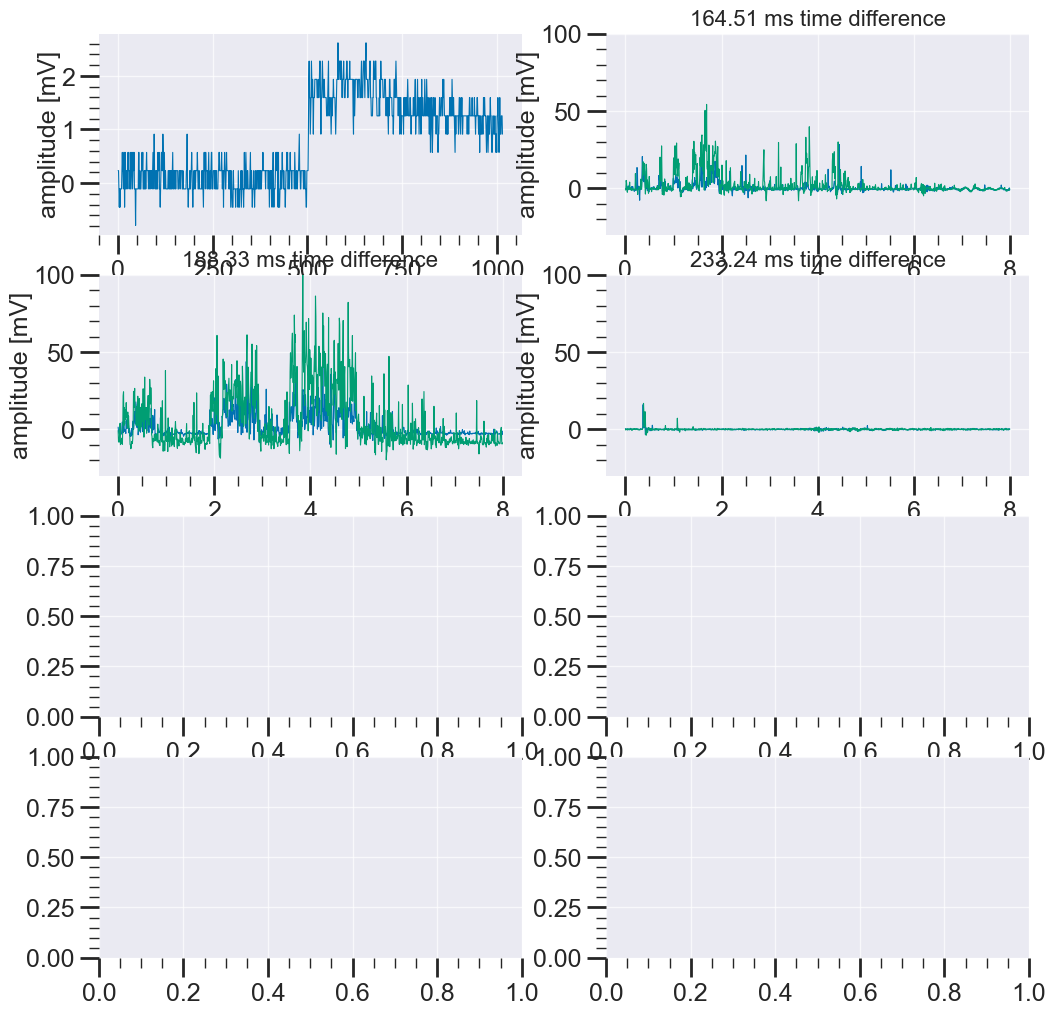

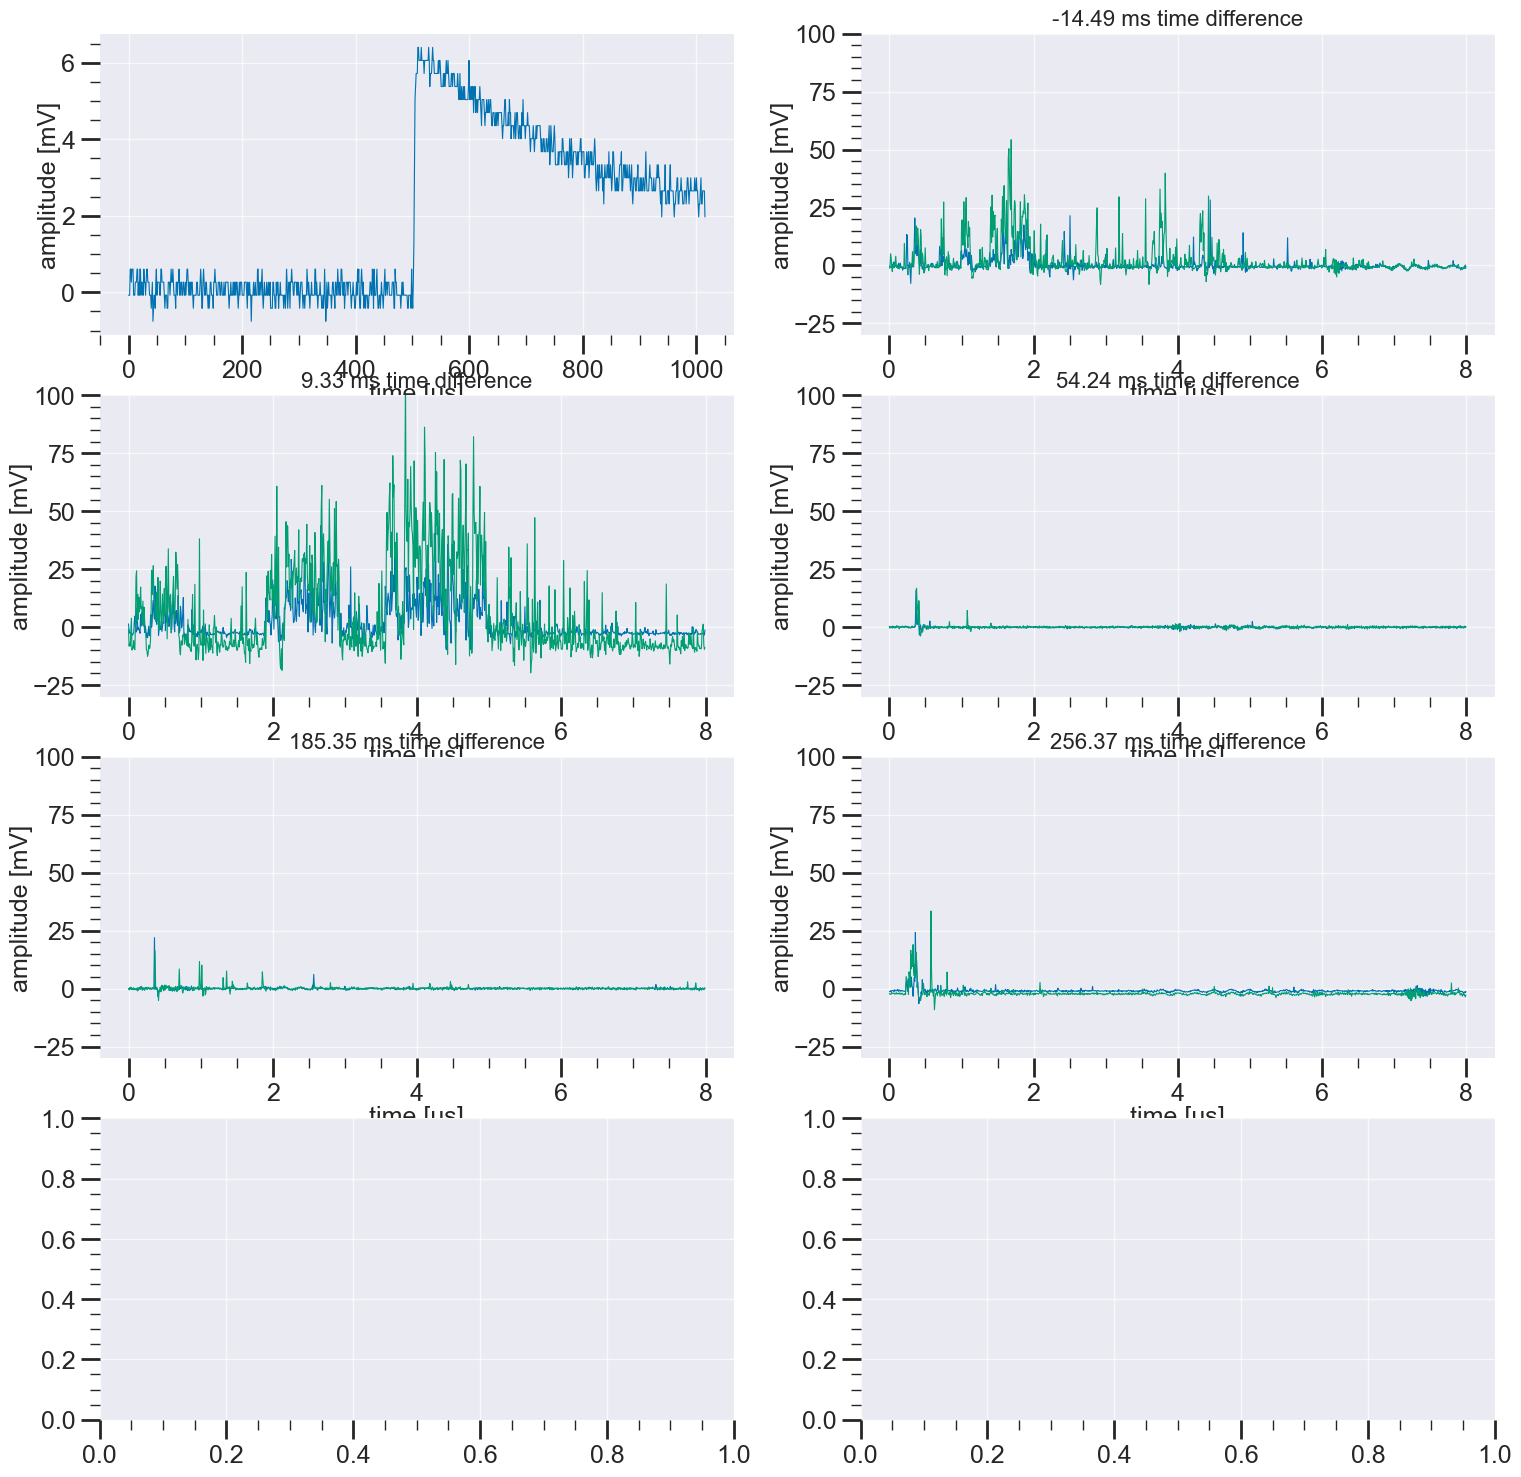

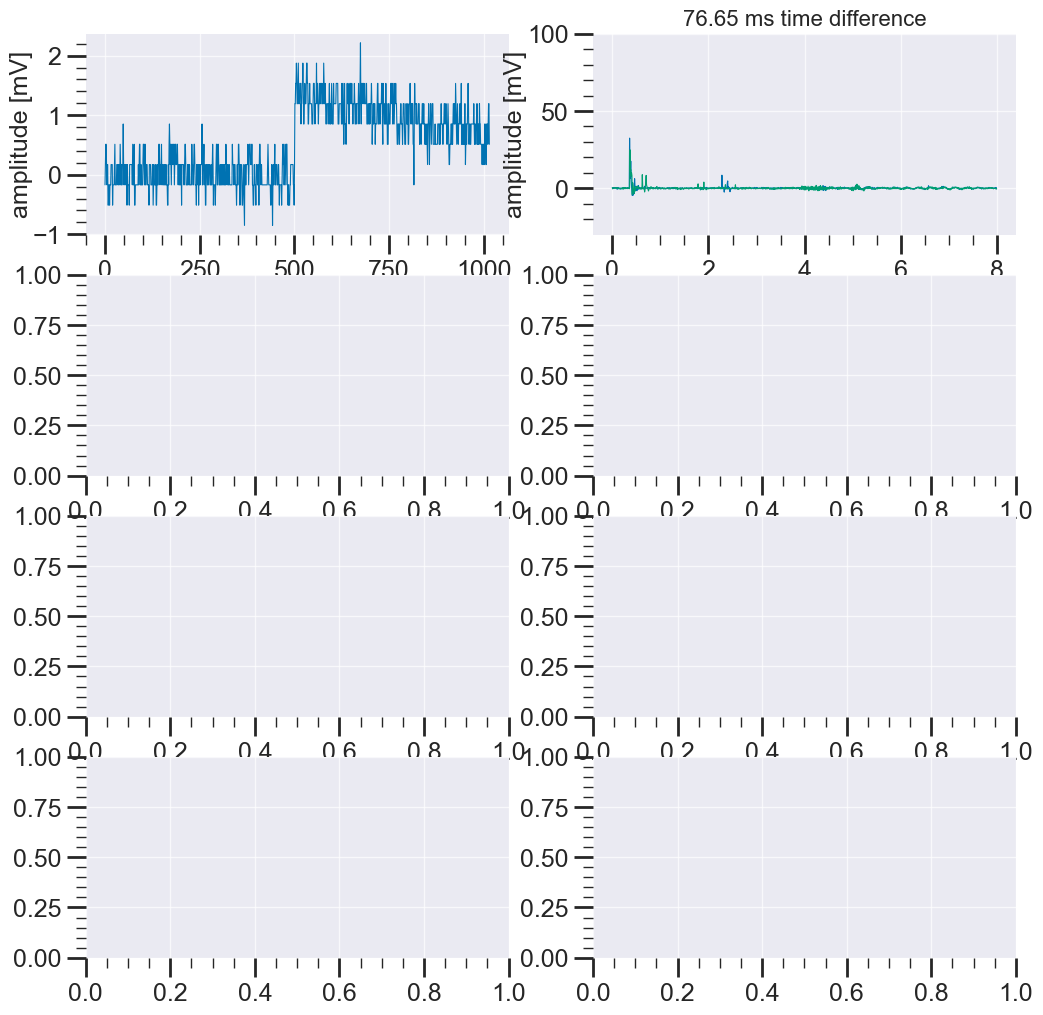

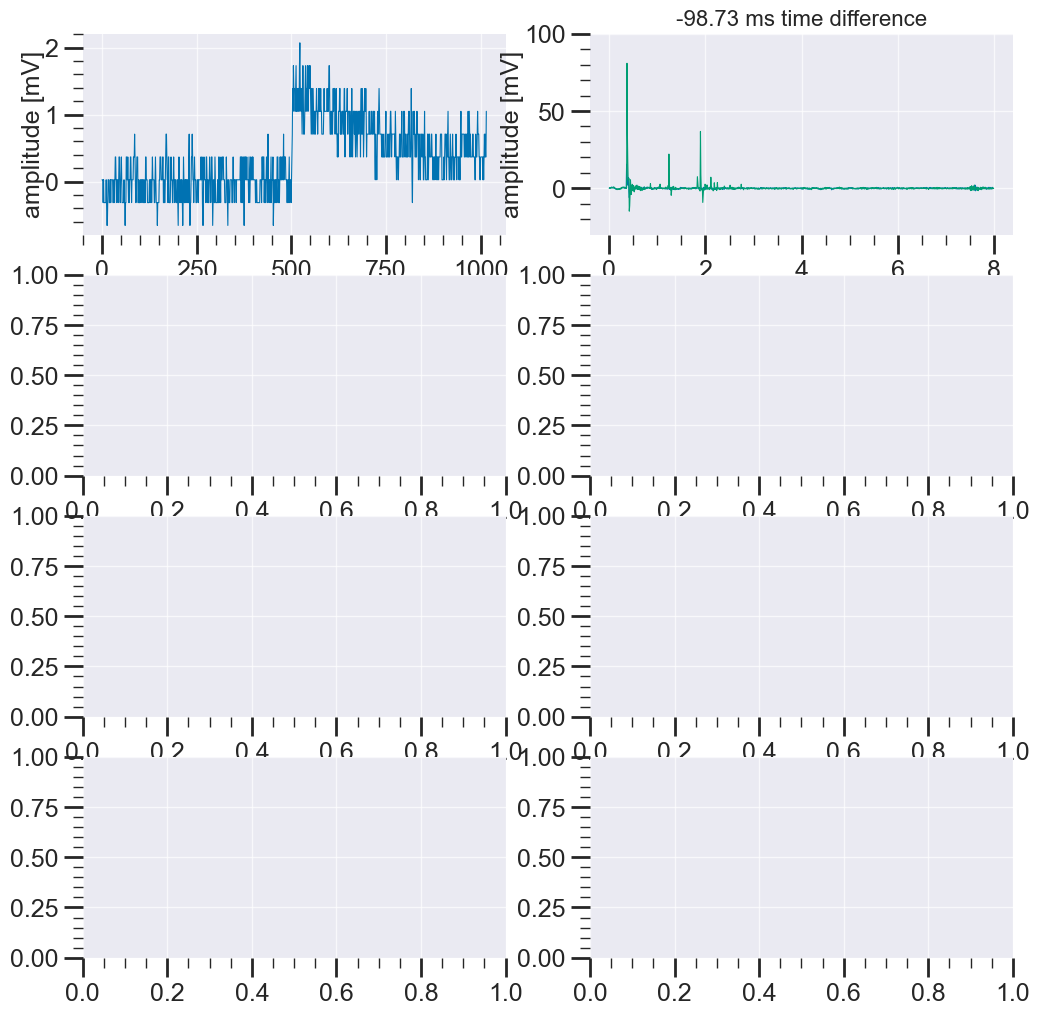

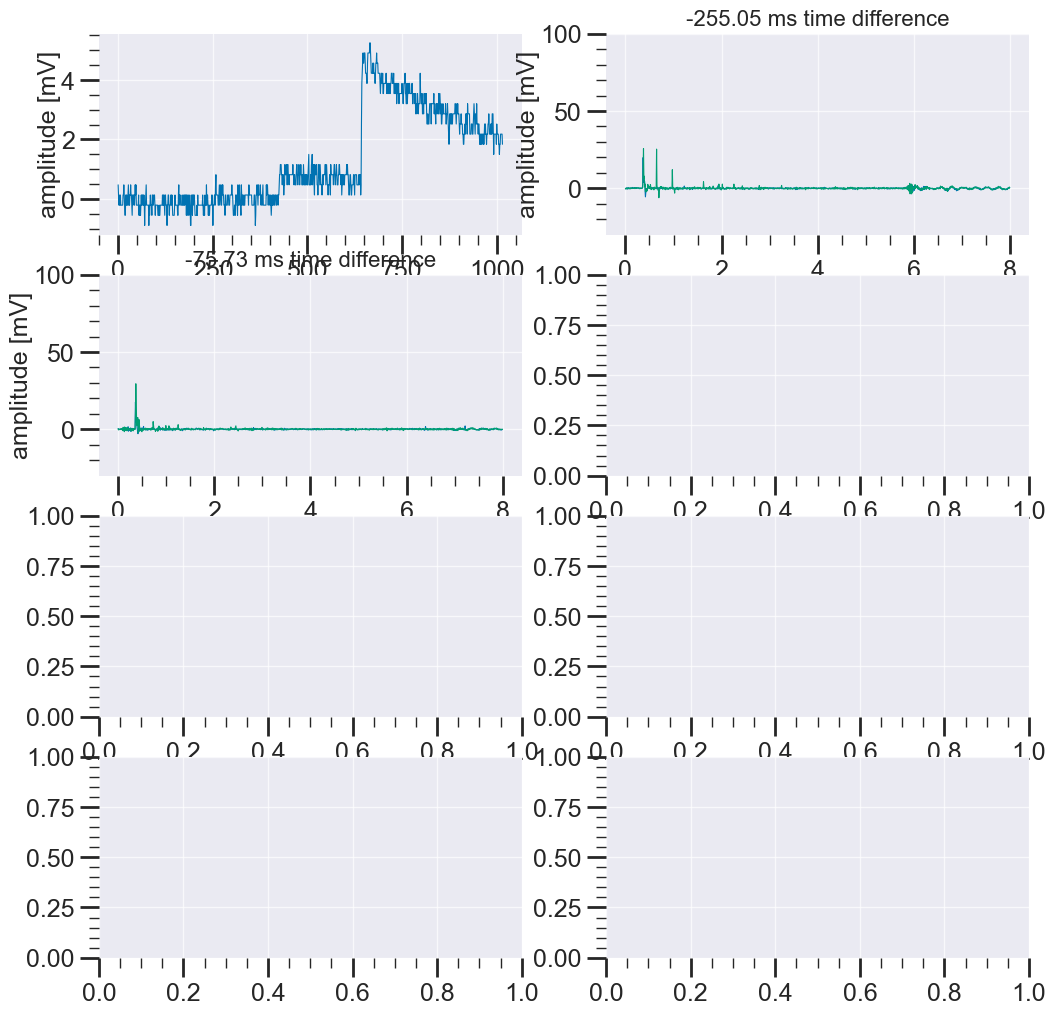

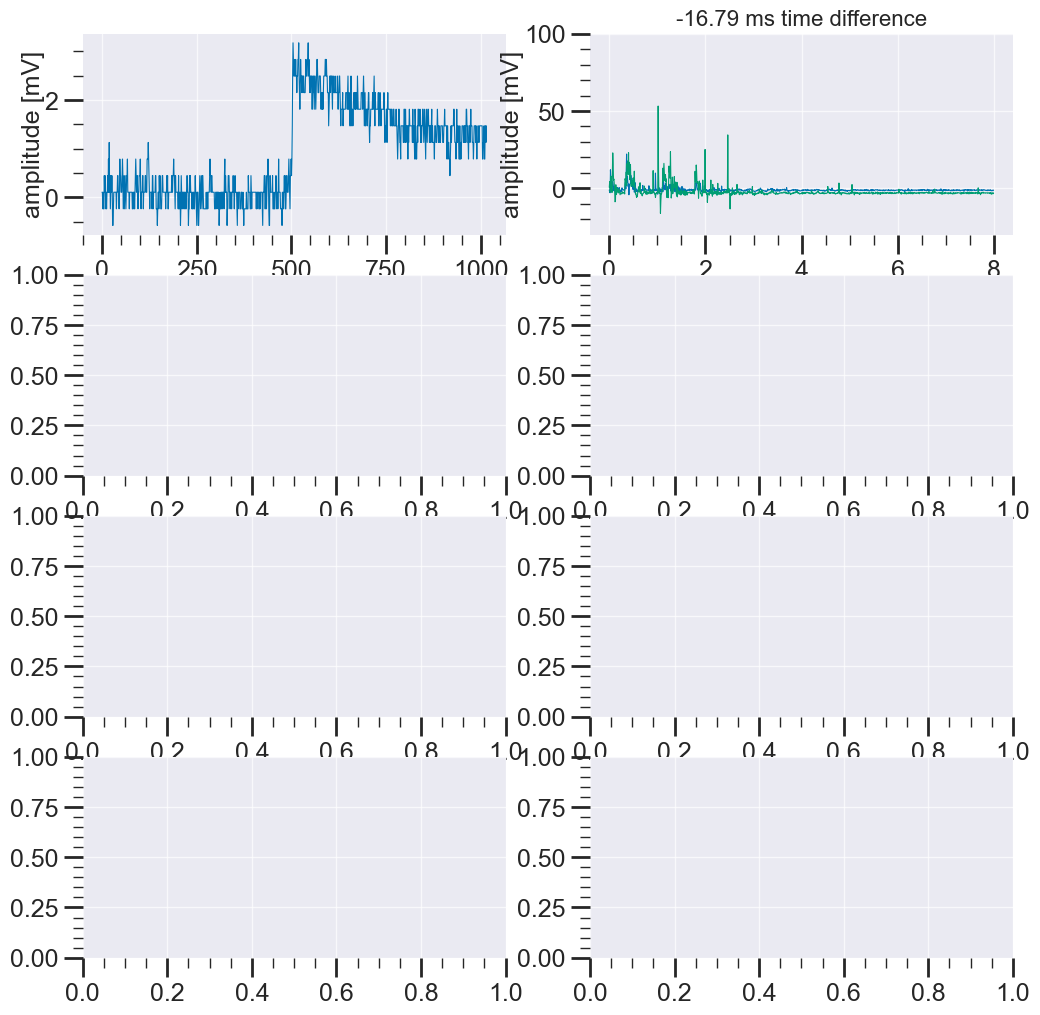

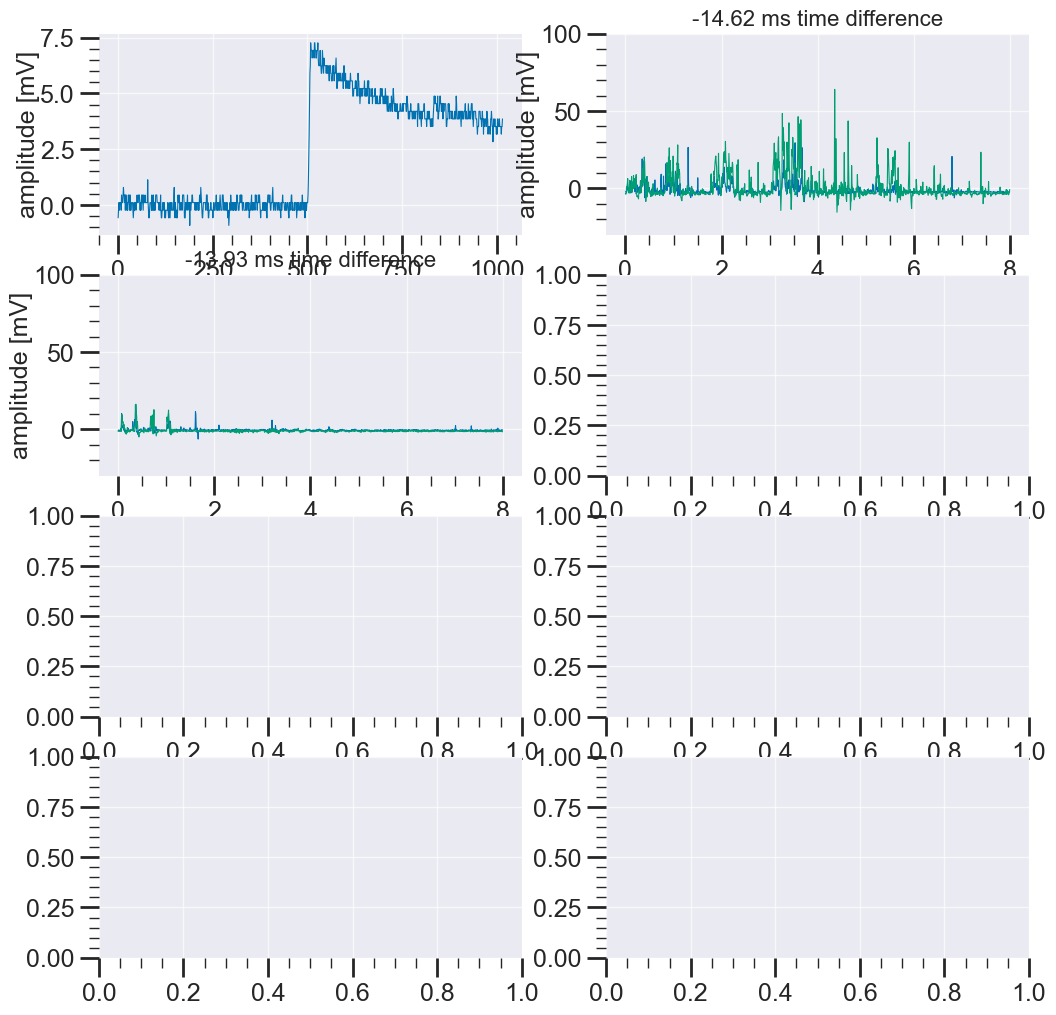

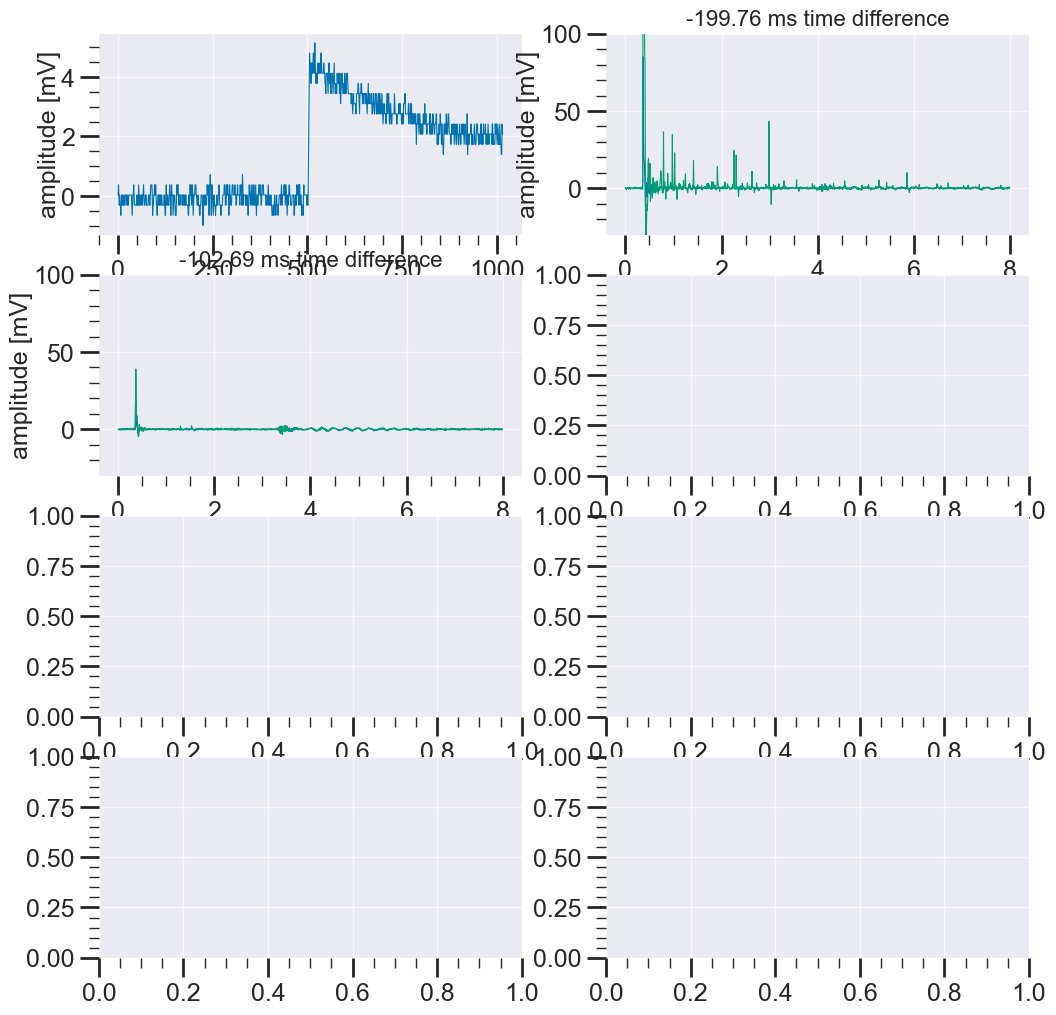

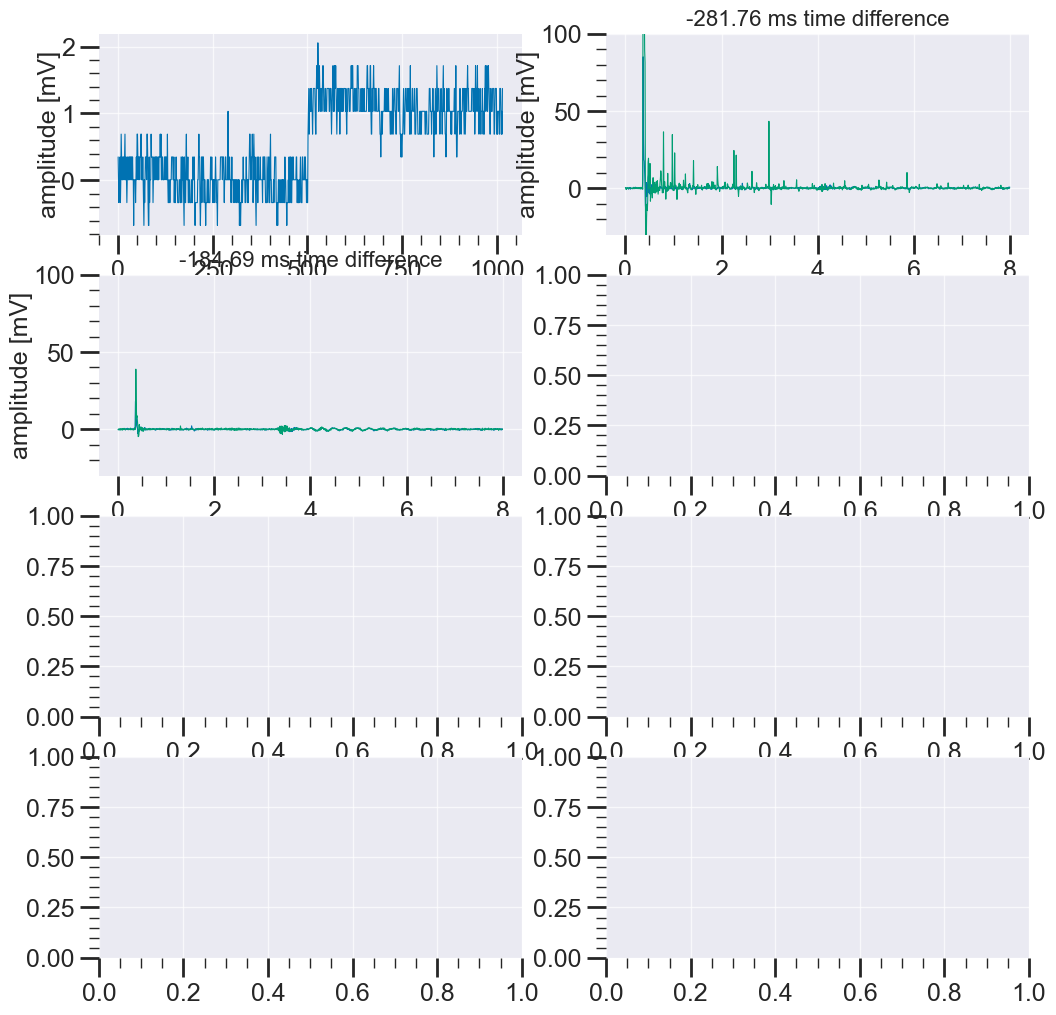

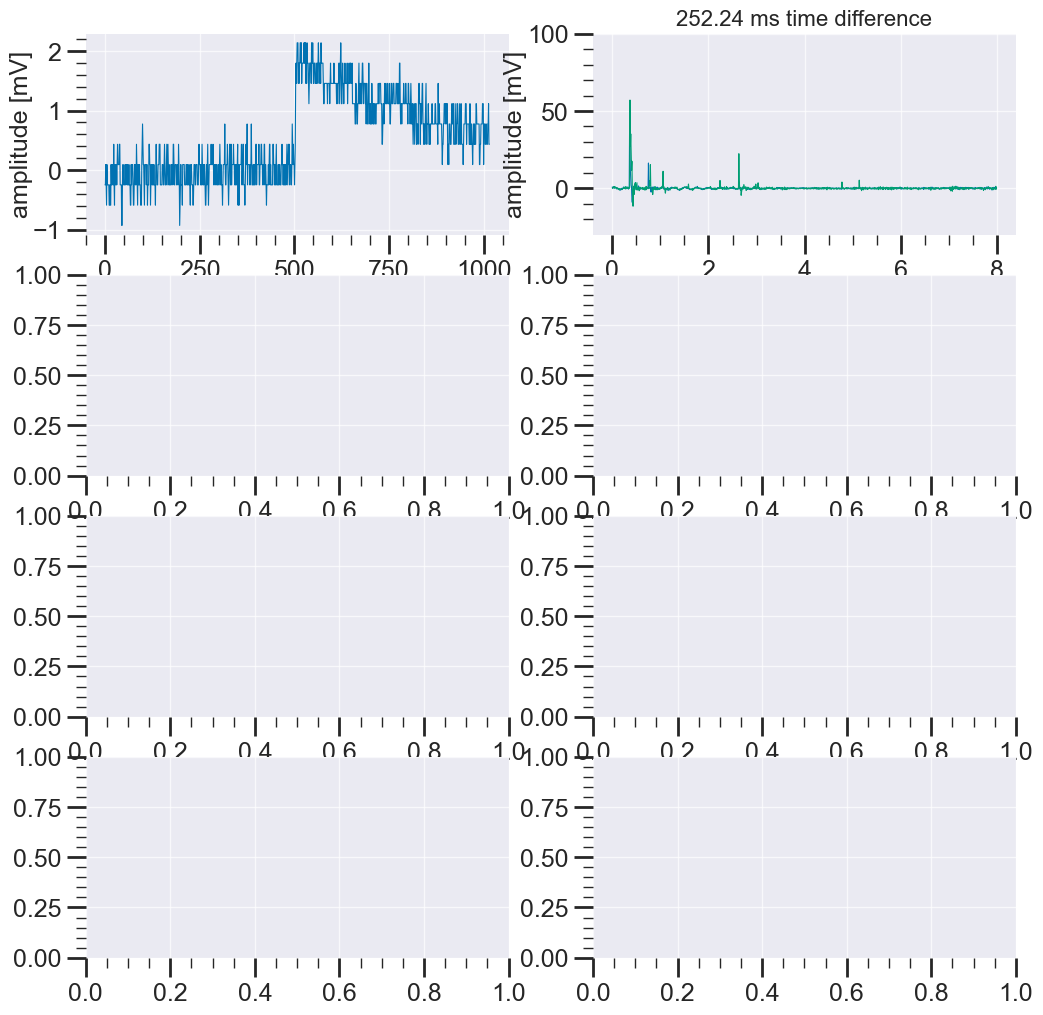

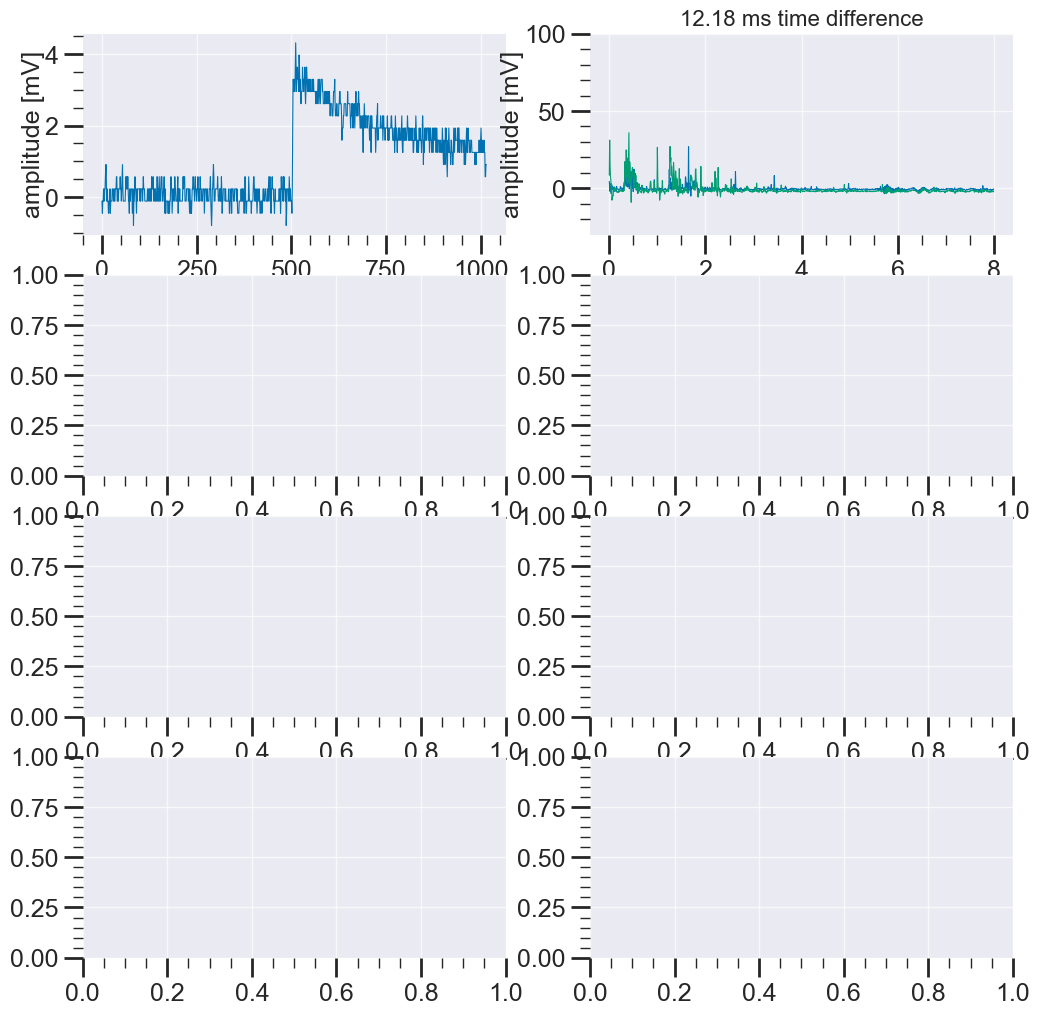

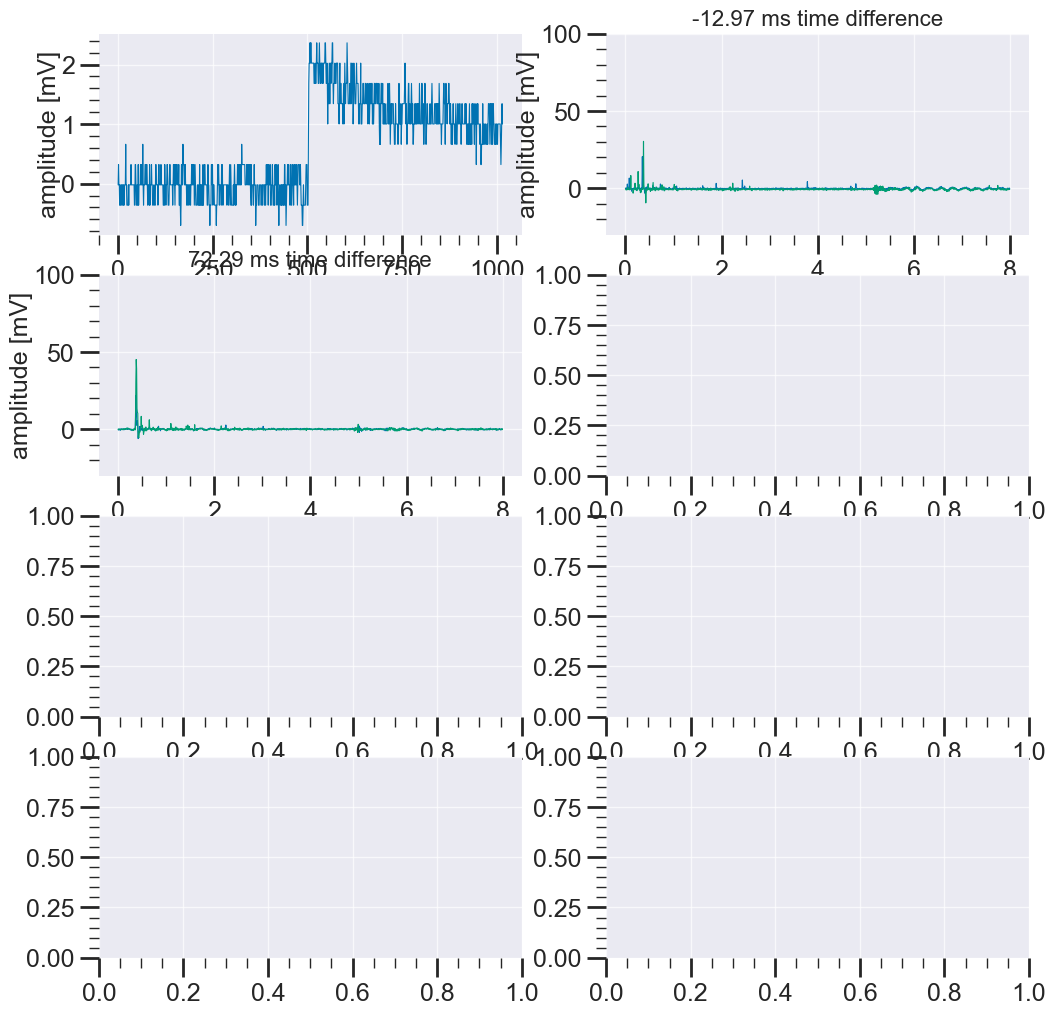

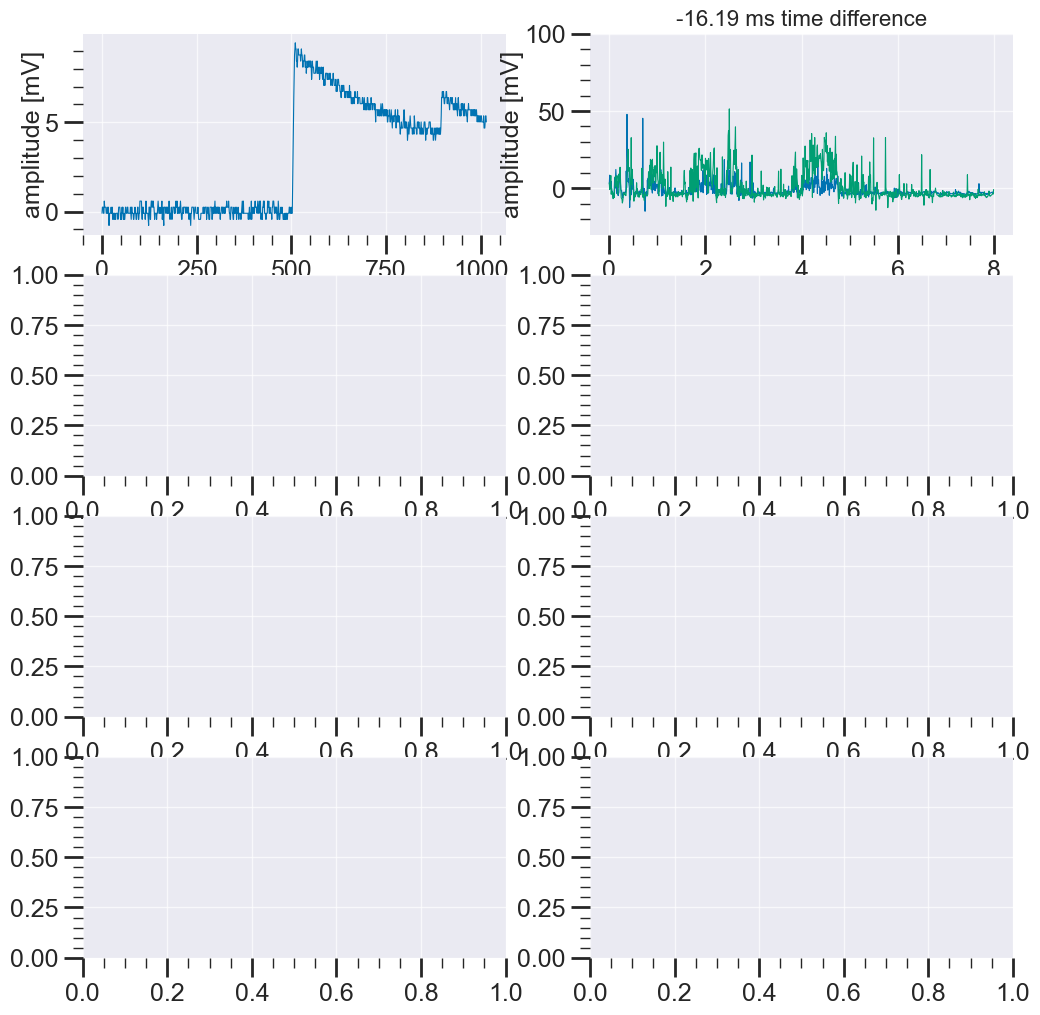

IndexError: list index out of range

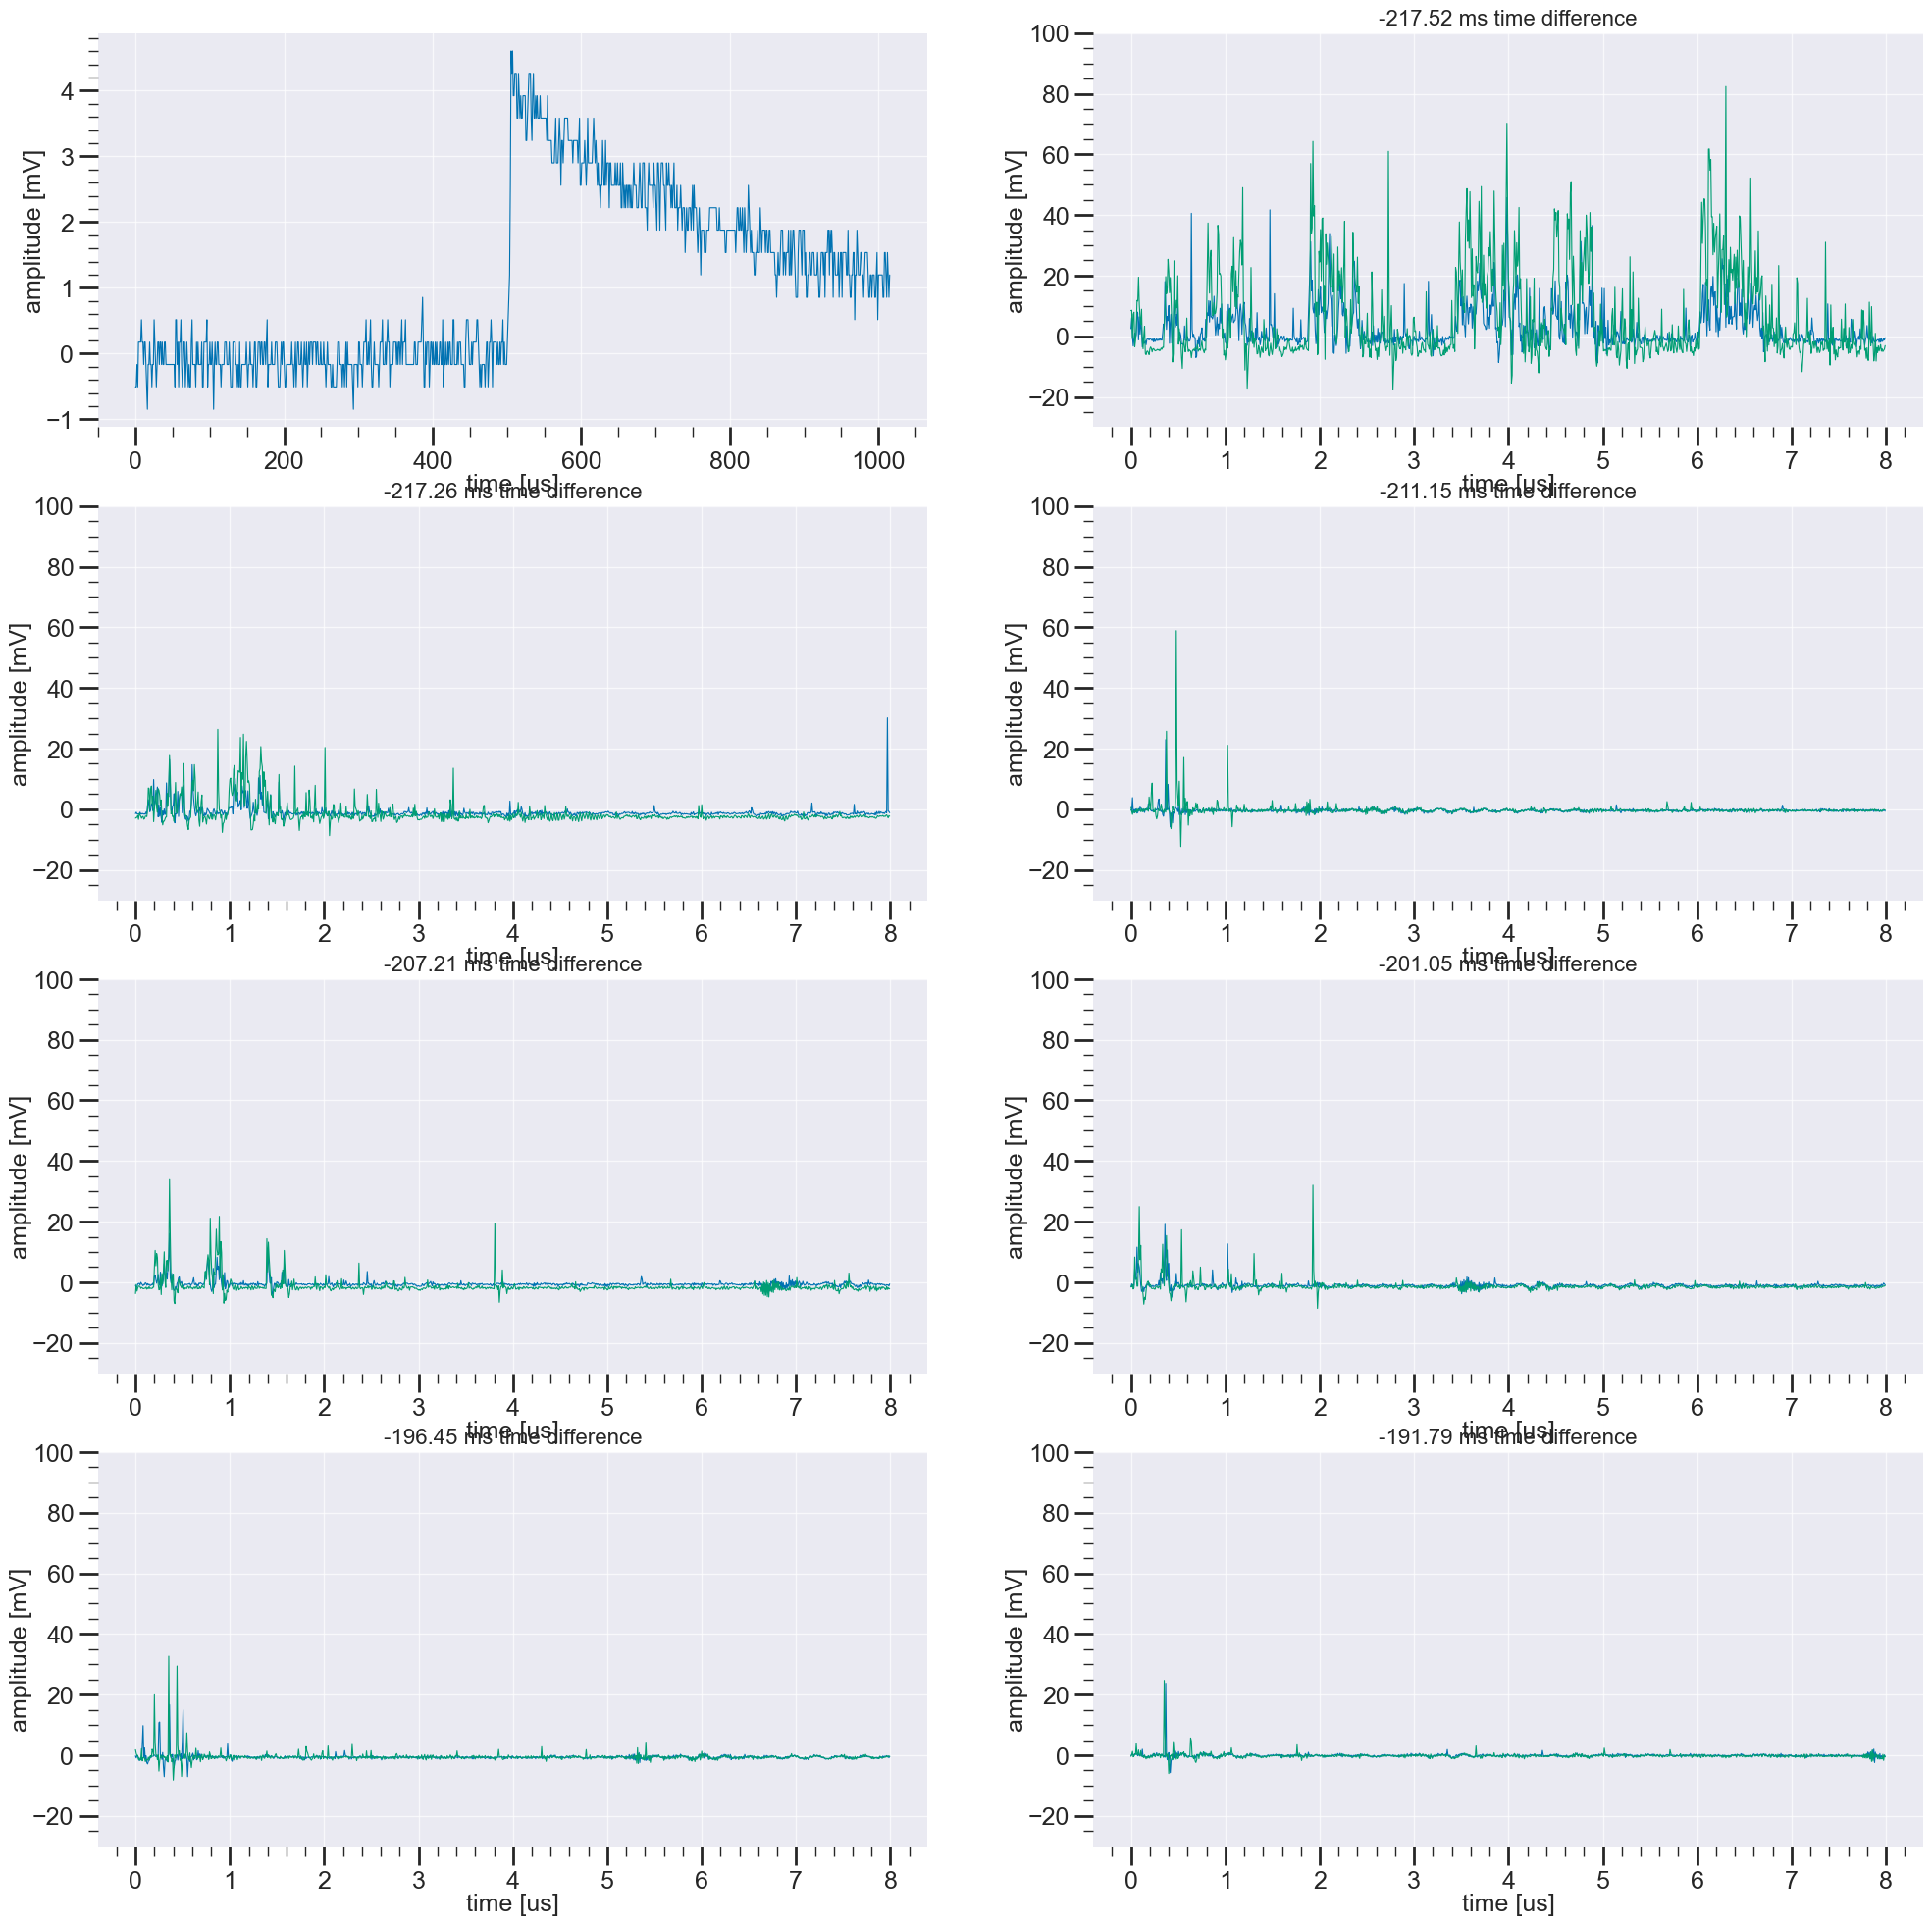

In [18]:

amp_th = 2
coinc_window = 0 #second
coinc_window_ns = 0.3*1e9 #nanoseconds
for f in ds.ad2_files:
    df, date = pickle.load(open(f, "rb")) #opens the pandas dataframe object in the pickle file
    for evidx, row in df.iterrows():
        ch1 = row["Data"][0]
        dT = row["dT"]
        if(np.max(ch1) > amp_th):
            pmt_events = ds.find_light_in_vacinity(row["Seconds"], row["Nanoseconds"], coinc_window, coinc_window_ns)
            N = len(pmt_events.index)
            if(N == 0):
                continue
            n_sq = int(np.sqrt(N)) + 1
            fig, ax_temp = plt.subplots(figsize=(n_sq*6, n_sq*6), nrows=4, ncols=2)
            #flatten this axs object
            axs = []
            for _ in ax_temp:
                if(n_sq == 1):
                    axs.append(_)
                else:
                    for __ in _:
                        axs.append(__)

            #plot the charge event on 
            ds.plot_charge(row, ax=axs[0])

            for j, pmtrow in pmt_events.iterrows():
                ax = axs[j+1]
                ds.plot_light(pmtrow, ax=ax)

                ax.set_ylim([-30, 100])
                ax.set_xlabel("time [us]")
                ax.set_ylabel("amplitude [mV]")
                timediff = ((pmtrow["Seconds"] - row["Seconds"]) + (pmtrow["Nanoseconds"] - row["Nanoseconds"])/1e9)*1e3
                ax.set_title("{:.2f} ms time difference".format(timediff))

            plt.show()
            #plt.savefig("../../../Results/Run7/ds11/pmt-coinc-with-charge/"+str(i).zfill(3)+"-"+str(j).zfill(3)+".png", bbox_inches='tight')




# Find events that are well separated from any charge events, and overlay

In [25]:
# get times of charge depositing pulses
#get any charge events above 2 mV
amp_th = 2
events = [] #{"time": datetime, "amp": mV, "hv": kV con}
for f in ds.ad2_files:
    df, date = pickle.load(open(f, "rb")) #opens the pandas dataframe object in the pickle file
    for evidx, row in df.iterrows():
        ch1 = row["Data"][0]
        dT = row["dT"]
        if(np.max(ch1) > amp_th):
            amp = np.max(ch1)
            kv = ds.get_hv_at_time(row["Seconds"])
            events.append({"time":row["Seconds"], "amp":amp, "hv":kv})

ch_events = events

In [38]:
plt.ioff()
nevts_per_plot = 10
nplots = 100
proximity = 60 #seconds, minimum distance to any charge deposition phenomena
ds.reload_struck_timebounds()
for i in range(nplots):
    f = np.random.choice(ds.struck_files)
    df, date = pickle.load(open(f, "rb"))
    evs = df.sample(nevts_per_plot, replace=False)
    fig, ax = plt.subplots()
    
    # These are in unitless percentages of the figure size. (0,0 is bottom left)
    left, bottom, width, height = [0.6, 0.5, 0.2, 0.2]
    ax_in = fig.add_axes([left, bottom, width, height])

    ev_counter = 0
    for _, ev in evs.iterrows():
        #check to make sure that this event is not in proximity
        #to charge deposition event
        t0 = ev["Seconds"]
        dont_plot = False
        for ch_ev in ch_events:
            if(np.abs(ch_ev["time"] - t0) < proximity):
                dont_plot = True
        if(dont_plot == False):
            ds.plot_light(ev, ax=ax, ax_in=ax_in)
            ev_counter += 1
    ax_in.set_xlim([0.3, 0.6])
    ax_in.patch.set_edgecolor('black')  
    ax_in.patch.set_linewidth(1) 
    ax.set_title("{:d} PMT events (two channels) not in proximity to charge depositions".format(ev_counter))
    ax.set_ylim([-30, 200])
    
    #plt.show()
    plt.savefig("../../../Results/Run7/cosmics-at-hv-ds11/same-scale/"+str(i).zfill(3)+".png", bbox_inches='tight')
        

    

# Comparison with cosmic waveforms


In [30]:
ds_single_cosm = "cosmics-endofrun/"
#load the dataset object for the single file selected
ds_cosm = Dataset.Dataset(topdir+ds_single_cosm, config)

no ramp file present at ../../data/Run7/cosmics-endofrun/ramp.txt, leaving it empty
no g-events-file present at ../../data/Run7/cosmics-endofrun/g_events.txt, leaving it empty
No ramp data in this dataset
Problem! Found no AD2 files with prefix 'prereduced*.p' in ../../data/Run7/cosmics-endofrun/


In [37]:
plt.ioff()
nevts_per_plot = 10
nplots = 100
proximity = 60 #seconds, minimum distance to any charge deposition phenomena
ds.reload_struck_timebounds()
for i in range(nplots):
    f = np.random.choice(ds.struck_files)
    df, date = pickle.load(open(f, "rb"))
    evs = df.sample(nevts_per_plot, replace=False)
    fig, ax = plt.subplots()
    
    # These are in unitless percentages of the figure size. (0,0 is bottom left)
    left, bottom, width, height = [0.6, 0.5, 0.2, 0.2]
    ax_in = fig.add_axes([left, bottom, width, height])

    ev_counter = 0
    for _, ev in evs.iterrows():
        ds.plot_light(ev, ax=ax, ax_in=ax_in)
        ev_counter += 1
    ax_in.set_xlim([0.3, 0.6])
    ax_in.patch.set_edgecolor('black')  
    ax_in.patch.set_linewidth(1) 
    ax.set_title("{:d} PMT events (two channels) at 0V (cosmics)".format(ev_counter))
    ax.set_ylim([-30, 200])
    
    plt.savefig("../../../Results/Run7/cosmics/same-scale/"+str(i).zfill(3)+".png", bbox_inches='tight')
        

    

In [73]:
for i, row in df.iterrows():
    print(row.name)
    if(row.name == 1): break

0
1
